 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
 

    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [4]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res
  

In [5]:
X_st = X.copy().astype(np.float64)

In [6]:
X_st[1] = calc_std_feat(X[1])

In [7]:
X_st[2] = calc_std_feat(X[2])

In [8]:
X_st[3] = calc_std_feat(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [9]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [10]:
def eval_model(X, y, iterations, alpha=1e-4):
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [11]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.73395537  3.78901086  4.34689103  3.45435565] 102.29848320553131
200 [56.38333257  4.22274918  3.88268167  3.53037592] 41.770392965277225
300 [57.26517002  4.56464846  3.48246533  3.59379538] 40.43037856402555
400 [57.38211891  4.84308883  3.14711165  3.65490676] 40.21695148385719
500 [57.39762862  5.0703053   2.86623187  3.71211152] 40.082074544784064
600 [57.39968551  5.25605187  2.63104682  3.76453462] 39.98898721403495
700 [57.39995829  5.40815217  2.43417478  3.81181928] 39.9245004244694
800 [57.39999447  5.53289716  2.26941351  3.85394953] 39.87977100888013
900 [57.39999927  5.63535757  2.13155504  3.8911246 ] 39.84871525877885
1000 [57.3999999   5.71963011  2.01622873  3.9236711 ] 39.82713578834306


array([57.3999999 ,  5.71963011,  2.01622873,  3.9236711 ])

In [12]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#     if i % (iterations / 10) == 0:
#       print(i, W, err)
  return W

In [13]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

In [14]:
W=[]
lst= [1/(10**i) for i in range(1, 20)]
# lst=[1/(i**3) for i in range(1, 100)]
for itm in lst:
    W.append(eval_model_reg2(X_st, y, iterations=2000, alpha=1e-2, lambda_=itm))



In [15]:
W=np.array(W)


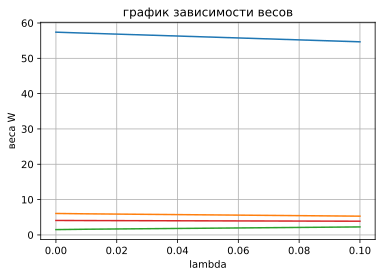

In [16]:
plt.plot(lst,W)
plt.title("график зависимости весов")
plt.xlabel("lambda")
plt.ylabel("веса W")

plt.grid(True)

 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [17]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_*W/(2*np.abs(W)))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [18]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [57.3976406   5.10793351  2.46012679  4.08692802] 39.98154887503836
1000 [57.3999749   5.76652174  1.85621614  4.03913605] 39.80712279096825
1500 [57.399975    5.99152687  1.60431984  4.06911223] 39.782340763126896
2000 [57.399975    6.07257438  1.50040226  4.09330547] 39.7784891065704
2500 [57.399975    6.10297576  1.45780461  4.10605623] 39.77786773926301
3000 [57.399975    6.11471091  1.4404084   4.11194664] 39.777766064624934
3500 [57.399975    6.11932809  1.43331981  4.11451221] 39.77774933934863
4000 [57.399975    6.12116707  1.43043517  4.11559636] 39.777746582221894
4500 [57.399975    6.12190514  1.42926221  4.11604694] 39.77774612712995
5000 [57.399975    6.12220276  1.42878549  4.11623243] 39.777746051881074


array([57.399975  ,  6.12220276,  1.42878549,  4.11623243])

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([ 450.,  605.,  760.,  915., 1070., 1225., 1380., 1535., 1690.,
        1845., 2000.]),
 <a list of 10 Patch objects>)

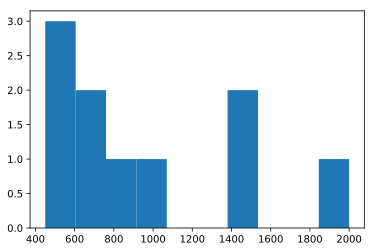

In [19]:
plt.hist(X[2])

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([-1.08270439, -0.76304881, -0.44339323, -0.12373764,  0.19591794,
         0.51557352,  0.8352291 ,  1.15488469,  1.47454027,  1.79419585,
         2.11385144]),
 <a list of 10 Patch objects>)

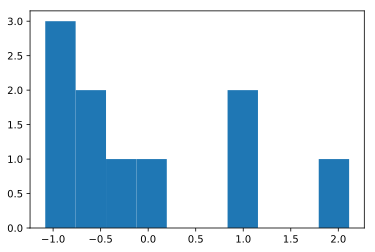

In [20]:
plt.hist(X_st[2])

In [21]:
X_norm2 = (X[2] - X[2].min()) / (X[2].max() - X[2].min())


(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

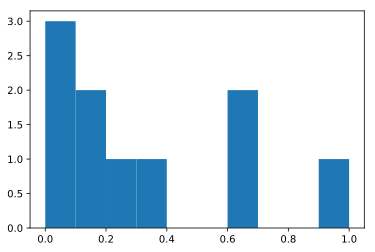

In [22]:
plt.hist(X_norm2 )

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([-1.08270439, -0.76304881, -0.44339323, -0.12373764,  0.19591794,
         0.51557352,  0.8352291 ,  1.15488469,  1.47454027,  1.79419585,
         2.11385144]),
 <a list of 10 Patch objects>)

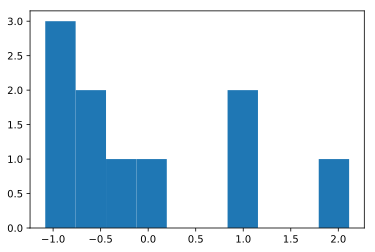

In [23]:
X_norm_st2 = calc_std_feat(X_norm2)
plt.hist(X_norm_st2)

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

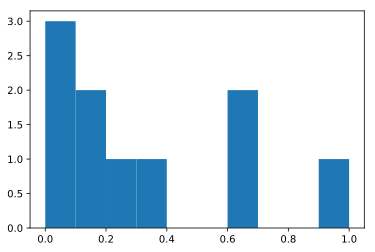

In [24]:
X_st_norm2 = (X_st[2] - X_st[2].min()) / (X_st[2].max() - X_st[2].min())
plt.hist(X_st_norm2)

Ответ-на мой взгляд применение нормализации и стандартизации бессмыслено, потому что результат применения сразу двух методов равен применению лишь последнего (первый метод обесцениватся)